## Do imports

In [1]:
# MDAnalysis tools
import MDAnalysis as mda
from MDAnalysis.analysis import contacts, align

# To view the trajs on notebook
import nglview as nv
from ipywidgets import interact, fixed

# Data processing
import pandas as pd
import numpy as np

# Plot & System tools
import matplotlib as mpl
import matplotlib.pyplot as plt
from  matplotlib.colors import ListedColormap, NoNorm, BoundaryNorm, CSS4_COLORS
import seaborn as sns

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import os

/home/ali/.local/lib/python3.8/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


# Set the directory for the simulation

In [ ]:
os.chdir('/home/ali/RELAXIN/CG_MD/full_traj2')

# Concatenate all the simulations

In [ ]:
l = ['reimaged2_' +str(x)+'.xtc' for x in range(1,11)]
finp_ref  = 'reimaged.gro'

print(l)
test = mda.Universe(finp_ref,l)
clust = test.select_atoms("all")
with mda.Writer("all_sim.trr", clust.n_atoms) as W:
    for ts in test.trajectory:
        W.write(clust)

# make index

In [ ]:
!echo -e "a 1-65  \nname 10 LDLa \na 184-877 \nname 11 LRR \nq" |gmx make_ndx -f reimaged.gro -o index.ndx

# Center in the box

In [ ]:
!echo 11 0|gmx_mpi trjconv -f all_sim.trr -o step7_production.pbc.xtc -s reimaged.gro -pbc mol -center -n index.ndx 

# align and save traj

In [ ]:
finp_ref  = 'reimaged.gro'                     # reference
finp_trj  = 'step7_production.pbc.xtc'       # traj


LRR = 'name BB and resid 100-390'


U   = mda.Universe(finp_ref, finp_trj)       #Open Traj
ref = mda.Universe(finp_ref)                 #Open ref file 

# Align traj to reference using atmgroup LRR
align.AlignTraj( U, ref, select=LRR, in_memory=True).run()
'Done Boss'

# save aligned traj
system_aligned = U.select_atoms("all")
with mda.Writer("traj_aligned_to_LRR.trr", system_aligned.n_atoms) as W:
    for ts in U.trajectory:
        W.write(system_aligned)

# Define Input  files (finp) and load the trajectory and reference structure file

In [ ]:
finp_ref  = 'reimaged.gro'                  # reference
finp_trj  = 'traj_aligned_to_LRR.trr'      # traj


U   = mda.Universe(finp_ref, finp_trj,in_memory=True)          #Open Traj
ref = mda.Universe(finp_ref)                                   #Open ref file 

display(U.trajectory)

# Visualize the protein

In [ ]:
view = nv.show_mdanalysis(U, gui=False)
view.add_representation('cartoon')
view

# Clustering

In [2]:
path = '/home/ali/RELAXIN/CG_MD/'

os.chdir(path)

folder = 'full_traj'
if not os.path.exists(folder):
    os.mkdir(folder)

os.chdir(path+os.sep+folder)

In [4]:
ls

 all_sim.trr                reimaged2_10.xtc   reimaged2_7.xtc
 checkpoint:volmap_out.dx   reimaged2_1.xtc    reimaged2_8.xtc
 cluster.log                reimaged2_2.xtc    reimaged2_9.xtc
'#cluster.log.1#'           reimaged2_3.xtc    step7_production.pbc.xtc
'#cluster.log.2#'           reimaged2_4.xtc    volmap_out.dx
'#cluster.log.3#'           reimaged2_5.xtc
 full_traj/                 reimaged2_6.xtc


In [5]:
!echo 10 0 | gmx_mpi cluster -f traj_aligned_to_LRR.trr -s reimaged.gro -cl clusters.xtc -cutoff 0.4 -method gromos -wcl 10 -n index.ndx -nofit -clid clusters.xvg -sz clusters_size.xvg -skip 20

                     :-) GROMACS - gmx cluster, 2020.6 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar      Christian Blau   Viacheslav Bolnykh     Kevin Boyd    
 Aldert van Buuren   Rudi van Drunen     Anton Feenstra       Alan Gray     
  Gerrit Groenhof     Anca Hamuraru    Vincent Hindriksen  M. Eric Irrgang  
  Aleksei Iupinov   Christoph Junghans     Joe Jordan     Dimitrios Karkoulis
    Peter Kasson        Jiri Kraus      Carsten Kutzner      Per Larsson    
  Justin A. Lemkul    Viveca Lindahl    Magnus Lundborg     Erik Marklund   
    Pascal Merz     Pieter Meulenhoff    Teemu Murtola       Szilard Pall   
    Sander Pronk      Roland Schulz      Michael Shirts    Alexey Shvetsov  
   Alfons Sijbers     Peter Tieleman      Jon Vincent      Teemu Virolainen 
 Christian Wennberg    Maarten Wolf      Artem Zhmurov   
                           and the project leaders:
     

Finding clusters                                                                                                                                                                                                          1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 

4141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141414141424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424242424343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434343434344444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454545454646464646464646464646464646464646464646464646464646464646464646464646464646464646464646464646464646

8383838383838383838383838383838383838383838383838383838383838383838383838383838383838383838383838383838383838383838383838383848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848484848585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858585858586868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686868686878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878787878888888888888888888888888888888888888888888888888888888888888888888888888888

1161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161161171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171171181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181181191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191191

1441441441441441441441441441441441441441441441441451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451451461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461461471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471471481481481481481481481481481481481481481481481481481

1721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721721731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731731741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741741751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751751

2002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002002012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012012022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022022032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032032

2302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302302312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312312322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322322332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332332

2602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602602612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612612622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622622632632632632632632632632632632632632632632632632632632632632632632632632632632632632632632632632632632632632632

293662936729368293692937029371293722937329374293752937629377293782937929380293812938229383293842938529386293872938829389293902939129392293932939429395293962939729398293992940029401294022940329404294052940629407294082940929410294112941229413294142941529416294172941829419294202942129422294232942429425294262942729428294292943029431294322943329434294352943629437294382943929440294412944229443294442944529446294472944829449294502945129452294532945429455294562945729458294592946029461294622946329464294652946629467294682946929470294712947229473294742947529476


Found 31415 clusters

Writing middle structure for each cluster to clusters.xtc
Writing all structures for the first 10 clusters with more than 1 structures to clusters.xtc%05d.xtc
Writing rms distance/clustering matrix                      1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 7 7 7 7 7 7 7 7 7 7 8 8 8 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9 910

GROMACS reminds you: "Heavier-than-air flying machines are impossible." (Lord Kelvin, President of Royal Society, 1895.)



check the trajectories clusters.xtc (contains all the clusters and each cluster has a number of frames(see bellow))

In [6]:
finp_ref=str('reimaged.gro')
finp_trj=str('clusters.xtc')

In [ ]:
C = mda.Universe(finp_ref,finp_trj) 
cluster = nv.show_mdanalysis(C, gui=False)

cluster

## The population in 10 first clusters

In [18]:
os.chdir(path)

folder = 'full_traj'

os.chdir(path+os.sep+folder)

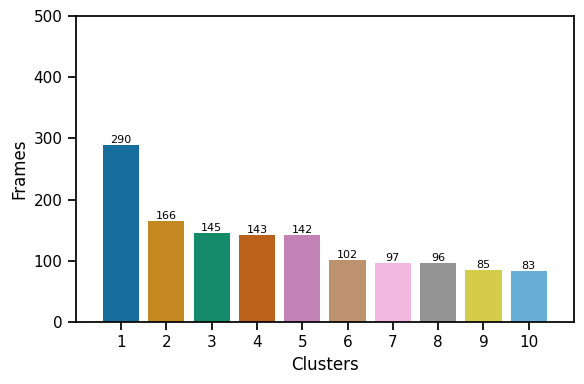

In [19]:
sns.set_context('notebook')
sns.set_palette('colorblind')

plt.figure(figsize=(6, 4))

x,y = np.loadtxt("clusters_size.xvg",comments=['#','@'],unpack=True) 

v = sns.barplot(x=x[:10].astype(int),y=y[:10])             ###change here if you want to see more clusters####
plt.xlim(-1,10)
plt.ylim(0,500)
for i in v.containers:
    v.bar_label(i,fontsize =8 )
    
plt.xlabel("Clusters")
plt.ylabel("Frames")
        
plt.tight_layout()

## Write a new traj with the first 5 clusters of each simulation and save in a new traj

In [ ]:
X = mda.Universe(finp_ref,'clusters.xtc')
    
# Save the 10 first clusters of each simu as a trajectory 
clusters = X.select_atoms("all")
with mda.Writer("10_clusters.trr", clusters.n_atoms) as W:
    for ts in X.trajectory[:10]:        
        W.write(clusters)

In [ ]:
# Check the trajectories

C = mda.Universe(finp_ref, '10_clusters.trr')

nv.show_mdanalysis(C)

In [ ]:
### save all the cluster frames to pdb files

for frame in range (len(C.trajectory)):
    C.trajectory[frame]
    atoms = C.select_atoms("all")
    atoms.write("frame"+str(frame)+".gro")

# RMSD Analysis

- HOWTO
    1. We first fit the traj using the receptor atoms (group `receptor`).
    2. After fitting, we obtain RMSD for different domains without superimposition.
    3. We create a dataframe (`df_rms`) as the container for RMSD data.
    4. In the dataframe, we use `Frame` signature as index (row labels).

In [ ]:
from MDAnalysis.analysis import rms, diffusionmap
from MDAnalysis.analysis.rms import RMSD
import plotly.express as px

In [ ]:
fout_rms   = 'RMSD.csv'          # rmsd output file
ref = mda.Universe(finp_ref) 

receptor = 'name BB and (resid 40-337)'
rec =CO.select_atoms(receptor)

peptide = 'resid 367-372'
pep = CO.select_atoms(peptide)

In [ ]:
R = RMSD(CO,
        ref,  # reference universe or atomgroup
        select= receptor,  # group to superimpose and calculate RMSD
        groupselections=[peptide])  # groups for domain RMSDs
R.run()
display('Done Boss', R.rmsd.shape)

In [ ]:
cols = ['Frame','Time', 'receptor','peptide' ]
df_rms = pd.DataFrame(R.rmsd, columns=cols)

df_rms.drop('Time',axis=1,inplace=True)      #Drop Frame column, we retain only Time

#df_rms['Time' ] = df_rms.Time* 0.001          #Convert time to ns
#df_rms.set_index('Time',inplace=True)         #Set Time as index (row labels)
#df_rms

In [ ]:
# Lets do time evolution of RMSD
fig = plt.figure(figsize=(12, 8))

df_rms.peptide.plot(alpha=0.5)
df_rms.receptor.plot(alpha=0.5)

plt.xlim( [0,25])
plt.ylim( [0,12])
plt.xlabel('frame')
plt.ylabel( ' RMSD $\AA$')
plt.legend()
plt.show()

In [ ]:
# Lets see the distribution of RMSD values
fig, ax = plt.subplots( figsize=(12,8) )
sns.distplot(df_rms.receptor,hist=True,label='receptor',ax=ax)
sns.distplot(df_rms.peptide,hist=True,label='peptide',ax=ax)

plt.legend(ncol=2,fontsize=9)
plt.xlabel('RMSD $\AA$')
plt.xlim( [0,12])
plt.show()

In [ ]:
#Save rmsd output to csv file

#df_rms.to_csv( fout_rms ,index_label='Time') 
#display(df_rms.head(5), df_rms.tail(4) )

# RMSD cross matrix

In [ ]:
matrix = diffusionmap.DistanceMatrix(CO, select=peptide).run()
matrix.dist_matrix.shape

fig = plt.figure(figsize=(12, 8))
plt.imshow(matrix.dist_matrix, cmap='inferno',interpolation='nearest')
plt.xlabel('Frame',fontsize='25')
plt.ylabel('Frame',fontsize='25')
plt.colorbar(label=r'RMSD')
plt.show()

In [ ]:
mat=matrix.dist_matrix
mat[mat<3]=0

In [ ]:
labels=['simu1','simu2','simu3','simu4','simu5']
fig = plt.figure(figsize=(12, 8))
plt.imshow(matrix.dist_matrix, cmap='inferno',interpolation='nearest')
plt.colorbar(label=r'RMSD')
plt.xlabel('Frame',fontsize='25')
plt.ylabel('Frame',fontsize='25')
#plt.xticks(np.arange(5),labels)
plt.show()

In [ ]:
dico = {
    "simu1" : [],
    "simu2" : [],
    "simu3" : [],
    "simu4" : [],
    "simu5" : [],
    "simu6" : [],
    "simu7" : [],
    "simu8" : [],
}
sim = []


for i in range(40):   
    x = np.where(matrix.dist_matrix[i]==0)
    #index = np.argwhere(x[0]==i)
    #y = np.delete(x, index)
    if (i<5):
        dico["simu1"].append(x[0].tolist())
        sim.append(1)
    elif i in range(5,10):
        dico["simu2"].append(x[0].tolist())
        sim.append(2)
    elif  i in range(10,15):
        dico["simu3"].append(x[0].tolist())
        sim.append(3)
    elif  i in range(15,20):
        dico["simu4"].append(x[0].tolist())
        sim.append(4)
    elif i in range(20,25):
        dico["simu5"].append(x[0].tolist())
        sim.append(5)
    elif i in range(25,30):
        dico["simu6"].append(x[0].tolist())
        sim.append(6)
    elif i in range(30,35):
        dico["simu7"].append(x[0].tolist())
        sim.append(7)
    elif i in range(35,40):
        dico["simu8"].append(x[0].tolist())
        sim.append(8)
    

In [ ]:
'''
From the dictionary with the matching frames for each simulations.

create a dataframe that will contain:
    - y : the count of each position
    - f_origin: value of the frame in trajectory
    - f_similar: similar frames to the origin frame
    - sim: the simulation we're iterating on
    - plot: a coordinate for the plotting
    - sim_similar: to which simulation the frame belongs

the goal is to fill each row of the dataframe with each matching pair. For that we need the number of rows given by
the sum of all the matching

Filling of dataframe:

Loop over simulations
    loop over each frame's matching group 
        loop over each match in group:
            append to a list the count (renewed when we change group)
            the y is the nth element in that list
            the simil is the value of each match
            the sim is the key of the dictionary (simulation name)
            the frame_origin has to be a number that changes only when we change group (fram)
            the plot has also to change also when we change group
'''

count = 0
for key, value in dico.items():
    for val in value:
        count +=len(val)
        
df_similar = pd.DataFrame(columns=(['y','f_origin','f_similar','sim','plot','sim_similar']),
                          index=[x for x in range(count)])


counter = 0
fram = 0
for key, value in dico.items():
    for val in value:
        
        y = []
        for c,i in enumerate(val):
            y.append(df.iloc[i]['y'])
            df_similar.iloc[counter]['y'] = y[c]
            df_similar.iloc[counter]['f_similar'] = i
            df_similar.iloc[counter]['sim'] = key
            df_similar.iloc[counter]['f_origin'] = fram
            df_similar.iloc[counter]['plot'] = fram+(0.1*c)
            df_similar.iloc[counter]['sim_similar'] = sim[i]
            counter += 1 
        fram +=1

In [ ]:
sns.set_context('talk')
s = [x for x in df_similar.sim]
s = sorted(list(set(s)))

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.5)

for j,i in enumerate(s):
    df_1 = df_similar[df_similar.sim == i]
    ax=plt.subplot(4,2,j+1)
    sns.barplot(data=df_1,x='plot',y='y',hue='f_origin',dodge=False,ax=ax)
    ax.set_xticks(ticks= ax.get_xticks(),labels=df_1.f_similar.values,rotation=45)
    ax.set_title(i)
    plt.ylim(0,5000)
    
plt.tight_layout()

In [ ]:
fig = px.bar(df_similar,
             x="f_origin", 
             y="y",
             color="sim_similar",
             hover_data =['f_similar'],
             color_discrete_sequence= px.colors.qualitative.D3)
             
fig.show()

In [ ]:
#save data frame to csv
#df_similar.to_csv( ) 
#display(df_similar.head(5), df_similar.tail(4) )

# Align the system to the reference .pdb
    - output = final_aligned_to_AA.trr

In [ ]:
path='/home/ali/qbio_Lab2/cg_simulations/clusters_5frames'
os.chdir(path)

In [ ]:
rec

In [ ]:
#make it work
traj = CO.select_atoms(receptor)
ref = mda.Universe('7f9z.pdb').select_atoms('name CA and resid 40:241 257:335 and chainID R')


# Align traj to reference using atmgroup receptor
hey= align.AlignTraj(traj,
                     ref, 
                     select='all',
                     match_atoms=False)
'Done Boss'

In [ ]:
#I did it in vmd (Maxime's script) but check later to make it work her 
#script = align2sels

#align2sels 3 0 0 "name CA and resid 40 to 241 257 to 335 and chain R" "name BB and resid 40 to 241 257 to 335"

CO = mda.Universe(finp_ref,'aligned_to_AA.trr', in_memory=True) 
conca=nv.show_mdanalysis(CO)
change_representation(conca,'cartoon')

In [ ]:
### save all the cluster frames to pdb files

for frame in range (len(CO.trajectory)):
    CO.trajectory[frame]
    atoms = CO.select_atoms("all")
    atoms.write("frame"+str(frame)+".gro")

In [ ]:
pwd


In [ ]:
# Lets view the Cluster representatives
r1 = mda.Universe( 'frame5.pdb' )
r2 = mda.Universe( 'frame0.pdb' )
r3 = mda.Universe( 'frame12.pdb' )

view = nv.show_mdanalysis(r1)
view.add_trajectory( r2 )
view.add_trajectory( r3 )

view[0].clear_representations()
view[0].add_cartoon(color='blue')
view[1].clear_representations()
view[1].add_cartoon(color='yellow')
view[2].clear_representations()
view[2].add_cartoon(color='cyan')

#view.display(gui=True)
#show_residues_around(view,selection="367-372",radius=4.0)
view

# Native Contacts

Suggested cutoff distances for different simulations

    For all-atom simulations, cutoff = 4.5 Å
    For coarse-grained simulations, cutoff = 6.0 Å


In [ ]:
ca1 = contacts.Contacts(CO, select=(receptor, peptide),
                        refgroup=(rec, pep), radius=6.0)

ca1.run()

# print number of averave contacts
average_contacts = np.mean(ca1.timeseries[:, 1])
print('average contacts = {}'.format(average_contacts))

# plot time series q(t)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(ca1.timeseries[:, 0], ca1.timeseries[:, 1])
ax.set(xlabel='frame', ylabel='fraction of native contacts',
       title='Native Contacts, average = {:.2f}'.format(average_contacts))
fig.show()

In [ ]:
n_ref = ca1.initial_contacts[0].sum()
print('There are {} contacts in the reference.'.format(n_ref))

# Density

In [ ]:
from MDAnalysis.analysis.density import DensityAnalysis
u = Universe('concatenated_md.trr', XTC)
ow = u.select_atoms("name OW")
D = DensityAnalysis(ow, delta=1.0)
D.run()
D.density.convert_density('TIP4P')
D.density.export("water.dx", type="double")

# RMSF Analysis

In [ ]:
fout_rmf   = 'RMSF.csv'  # rmsf output file

In [ ]:
# RMSF is calculated in blocks
nblocks = 5                                 #No. of blocks
size = CO.trajectory.n_frames / nblocks       #Size of a block, 1000 frames
df_rmsf  = pd.DataFrame()   

size = int(size)
print( f"Number of frames in each block:{size}" )

for block in range(nblocks):
    # Start and End frames as obtained as intergers
    begin = (block * size) ;  end = (block + 1) * size
    print( f"Start frame:{begin} and End frame:{end}")
    
    # We use rms.RMSF routine to calculate the rmsf.
    brmsf = rms.RMSF( CO.select_atoms(peptide), verbose=True ).run( start = begin , stop = end)
    df_rmsf[ f"B{block+1}" ]  =  brmsf.results.rmsf

print('Done Boss')

In [ ]:
# Extract residue numbers, keep them as row labels
Rids = CO.select_atoms(peptide).resnums  # resnums gives residue numbers for atmgroup Full
df_rmsf.index = Rids
df_rmsf.index.name = 'Residue' 

In [ ]:
sns.boxplot(data=df_rmsf) 
plt.tight_layout()
plt.ylabel('RMSF $\AA$')

In [ ]:
# We can save the dataframe to output file

#df_rmsf.to_csv(fout_rmf ,index_label='Residue')
#display( df_rmsf.head(5),df_rmsf.tail(4))

#### **4. PCA Analysis**
- HOWTO
    1. PCA analysis is usually performed on a subset of atoms
        - Herein, we consider C$_\alpha$ atoms
    2. Since we have a longer trajectory, we use frames in 500 ps interval (0.5 ns)
        - Herein, we use begin, end, skip variables to define the range
    3. After applying PCA, we estimate statistical parameters
        - Cumulated variance
    4. We project the trajectory on PCA space
    5. We save projections on a dframe (`df_pca`)
        - We use `Time` signature as our dframe index

In [ ]:
fout_rmf   = 'RMSF.csv'  # rmsf output file
fout_pca   = 'PCA.csv'   # PCA projections
fout_cls   = 'CLUS.csv'  # Cluster output file

In [ ]:
from sklearn.decomposition import PCA
import hdbscan as HDBSCAN               #clustering algorithm

In [ ]:
# Selecting an atom group to apply PCA
sel = backbone
begin,end,skip = 0 , 10000 , 5

# PCA starts here
mypca = pca.PCA( U , select= sel )
mypca.run(begin,end,skip)
print('Done Boss')

In [ ]:
# Cumulated variance
# Infer number of PC components that explain most variance

display( f"Total number of PCs: {mypca.cumulated_variance.size} " )
print( f"Cumulative variance of first 10 PCs\n{ mypca.cumulated_variance[:9] } " )

In [ ]:
# Calculate projection for first 5 components

atmgrp =  U.select_atoms( sel ) ; ncomps = 9
pcspace = mypca.transform( atmgrp, n_components= ncomps, start = begin,stop = end,step = skip)

# Place the results in a dataframe
cols = [ f"PC{x+1}" for x in range(ncomps) ]
df_pca = pd.DataFrame( pcspace , columns= cols )
df_pca.head(5)

In [ ]:
# Add Time signatures to projection data
# We extract Time from df_rms data passing begin,end and skip values

df_pca['Time'] = df_rms.index[begin:end:skip]
df_pca.set_index('Time',inplace=True)

# Save the output to csv file
#df_pca.to_csv( fout_pca , index_label= 'Time' )
#display( df_pca.head(5) , df_pca.tail(4)  )

#### **View Motion along PCAs**
- For the first three PCs, firstly we identify,
    1. Min and Max projection values
    2. Time index and Frame number at which min and max happens
    3. Projected coordinates for the corresponding frames (`use get_motion` function)
    4. Use nglview to visualize the motion

In [ ]:
# 1. Min and max values for first three PCs
df_pca.iloc[:,:3].min() ,  df_pca.iloc[:,:3].max()

In [ ]:
# 2a Time @ which Min & Max values observed
allmin = df_pca.iloc[:,:3].idxmin(axis=0, skipna=True) 
allmax = df_pca.iloc[:,:3].idxmax(axis=0, skipna=True)
allmin,allmax

In [ ]:
# 2b Frame @ which Min & Max values observed
all_index = df_pca.index
for x,y in zip( allmin, allmax):
    print( f"min:{x} , max:{y}" )
    print( f"min-frame:{all_index.get_loc(x)} , max-frame:{all_index.get_loc(y)}\n" )  

#### **5. Cluster Analysis**
- HOWTO
    - There are many ways one may cluster the trajectory
      - Herein, we use the distribution of points on PCA space for clustering.
      - To this end, we use a density based clustering algorithm (hdbscan)
          - Note that density based methods identify also noise points that could not be assigned to any cluster.
    - Once the clusters are identified, we estimate
      - Distance of each point to the centroid of the cluster they belong to.
      - We extract the conformation close to centroid as `cluster representative`
    - Clustering results, as usual, are placed in a dframe ( `df_clus` )    

In [ ]:
# A cluster should have atleast 5% of total population

minsize = int( df_pca.shape[0]*.05)
print( f"Mininum samples in a cluster:{minsize}" )

# We use hdbscan library here (examine the Imports section at the top)
# We use PCs 1-5

hdbs = HDBSCAN.HDBSCAN(min_cluster_size=minsize)
hclus = hdbs.fit_predict(df_pca.loc[:,'PC1':'PC10'] )

# Obtain total number of clusters
Nclus = set(hclus)
display( f'No of clusters: { len( Nclus ) } and cluster ids: {Nclus} ')

In [ ]:
# Create dframe to store cluster results
df_clus = pd.DataFrame( )

# Assign clusters and time index
df_clus['Cluster' ] = hclus
df_clus.index.name = 'Time'
df_clus.index = df_pca.index

display( df_clus.head(5),df_clus.tail(4) )

In [ ]:
# We extract RMSD values for frame in each cluster
df_rms.iloc[ begin:end:skip ].full

In [ ]:
# Add RMSD to cluster data
df_clus[ 'RMSD' ] =  df_rms.iloc[ begin:end:skip ].full

In [ ]:
display( df_clus.head(5),df_clus.tail(2) )

In [ ]:
# First, we assign CDist as a column with value 0
df_clus['CDist'] = 0.0

# For each point, we obtain its distance to the centroid

for val in Nclus:
    print(f"Current cluster id:{val}")
    # Extract subset of dframe corresponding to the cluster id
    subset = df_clus[df_clus.Cluster == val].index
    points = df_pca.loc[ subset, "PC1":"PC3" ].values
    Mean   = points.mean(axis=0)
    
    # Distance to cluster centroid (i.e mean value)
    dist = np.sqrt( ( (points - Mean)**2 ).sum(1)  )
    df_clus.loc[ subset, 'CDist'] = dist
                
df_clus.head()

In [ ]:
# Collect as Time values in df_rms
Frame = df_rms.index

# For each Time information df_clus, collect corresponding frame number from df_rms
Frame_no = [ Frame.get_loc(x) for x in df_clus.index ]

# Add Frame number as new column in the cluster data
df_clus['FRAME'] = Frame_no

#df_clus.to_csv( fout_cls , index_label= 'Time')
df_clus.head(4)

In [ ]:
# For each cluster, identify point closer to centroid (i.e, Min of CDist)
print(df_clus.groupby(['Cluster']).min() )
Mns = df_clus.groupby(['Cluster']).min().CDist

In [ ]:
# Structure closer to centroid can be considered as representatives
# Identify frame no of representatives
df_clus[ df_clus.CDist.isin(Mns) ]

- **Attension**
    1. In density based clustering `-1` represents noise points in space.
        - We are not interested in the representatives of noise points.
    2. We know the `Time` signature and `Frame no` of the representatives
        - Hence, we save the representatives as pdb's

In [ ]:
# Cluster -1 is noise, so we ignore it

Sel = U.select_atoms('protein')
U.trajectory[2035]
Sel.write('C1.pdb')

U.trajectory[7735]
Sel.write('C2.pdb')

#U.trajectory[4955]
#Sel.write('C3.pdb')

## DATA VISUALIZATION


#### **PCA**

In [ ]:
# Visualize cumulative variance of first 10 PCs
fig, ax = plt.subplots( figsize=(4.5,3.2) )
Y = mypca.cumulated_variance[:10]
X = [ l+1 for l in range(10) ]
ax.plot( X, Y ,'s--' ,ms=5)
ax.axhline( Y[2], color='b' , ls='--' )
ax.set_ylabel('Explained Variance (%)')
ax.set_xlabel('PC index')

In [ ]:
# We visualize the scatter plots for most prominent (PC1-3)
# Make scatter plots of PCs1-3
fig, ax = plt.subplots(1,2,figsize=(10,4),dpi=300 )
fig.subplots_adjust( wspace = 0.32)

sns.scatterplot(data=df_pca,x="PC1",y="PC2",ax=ax[0])
sns.scatterplot(data=df_pca,x="PC1",y="PC3",ax=ax[1])


# Seaborn color maps (https://seaborn.pydata.org/tutorial/color_palettes.html)

#sns.kdeplot(data=df_pca,x="PC1",y="PC2",ax=ax[0],shade=True,cmap='Greys_r')
#sns.kdeplot(data=df_pca,x="PC1",y="PC3",ax=ax[1],shade=True,cmap='Set1')


In [ ]:
# Distribution along individual PC components
sns.distplot(df_pca.PC1,label='PC1',hist=False)
sns.distplot(df_pca.PC2,label='PC2',hist=False)
sns.distplot(df_pca.PC4,label='PC4',hist=False)
sns.distplot(df_pca.PC5,label='PC5',hist=False)

plt.legend()  #Explained Variance reduces as we go from PC1 to PC5
plt.xlim([-100,100])
sns.set(rc={'figure.figsize':(10,4)})

#### **Cluster Evolution**


In [ ]:
# Lets map clusters on RMSD plot
nclus = set( df_clus.Cluster)
fig, ax = plt.subplots( figsize=(10,8) )

for val in nclus:
    # val -1 indicates noise points
    # For each cluster, we show frame closer to cluster centroid as Cross
    if val > -1:
        data = df_clus[ df_clus.Cluster == val ]
        ax.plot( data.index,data.RMSD,'.')
        
        Mn = data.CDist.min()
        Cent =  data[ data.CDist == Mn ]
        ax.plot( Cent.index, Cent.RMSD, 'X',color='green',ms=16)
            

ax.set_xlabel('Time ns')
ax.set_ylabel('RMSD $\AA$')

In [ ]:
# Lets view the Cluster representatives
r1 = mda.Universe( 'C1.pdb' )
r2 = mda.Universe( 'C2.pdb' )
#r3 = mda.Universe( 'C3.pdb' )

view = nv.show_mdanalysis(r1)
view.add_trajectory( r2 )
#view.add_trajectory( r3 )

view[0].clear_representations()
view[0].add_cartoon(color='blue')
view[1].clear_representations()
view[1].add_cartoon(color='yellow')


#view[2].clear_representations()
#view[2].add_cartoon(color='cyan')

#view.display(gui=True)
#show_residues_around(view,selection="367",radius=4.0)
view

#### **Inference:**